In [11]:
import pandas as pd

In [56]:
output_file=open('/media/kush/2TB HDD A/kallisto_bustools_getting_started/bus_output_07/spliced/remake.genes.txt','w')
data=pd.read_csv('/media/kush/2TB HDD A/kallisto_bustools_getting_started/cDNA_introns.t2g.txt',sep='\t',header=None)

In [99]:
print(data)

                        Number              GID    Gene Code
0            ENST00000456328.1  ENSG00000223972      DDX11L1
2            ENST00000488147.3  ENSG00000227232       WASH7P
3            ENST00000619216.4  ENSG00000278267    MIR6859-1
4            ENST00000473358.5  ENSG00000243485  MIR1302-2HG
6            ENST00000607096.7  ENSG00000284332    MIR1302-2
...                        ...              ...          ...
226805  ENST00000618998.226806  ENSG00000275757    RNA5-8SN2
226806  ENST00000615362.226807  ENSG00000278573     AC007325
226807  ENST00000617983.226808  ENSG00000276017     AC007325
226808  ENST00000613204.226809  ENSG00000278817     AC007325
226809  ENST00000615165.226810  ENSG00000277196     AC007325

[64792 rows x 3 columns]


In [56]:
csv('/media/kush/2TB HDD A/kallisto_bustools_getting_started/cDNA_introns.t2g.txt',sep='\t',header=None)
data.columns=["Number","GID","Gene Code"]
#data.sort_values("GID", inplace = True) 
data.drop_duplicates(subset ="GID", keep = "first", inplace = True) 
1
dataList=list(isolatedData)
for i in dataList:
    output_file.write(i+"\n")
output_file.close()

In [113]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import scipy as scp

folderWithFiles='/media/kush/2TB HDD A/kallisto_bustools_getting_started/bus_output_07/spliced'

matrix=sc.read_mtx(folderWithFiles+'/s.mtx')
barcodes=pd.read_csv(folderWithFiles+'/s.barcodes.txt',header=None)
genes=pd.read_csv(folderWithFiles+'/remake.genes.txt',header=None)
matrix.obs.index = barcodes[0].values
matrix.var.index = genes[0].values
dfMatrix=matrix.to_df()

In [118]:
print(dfMatrix)

                  DDX11L1  WASH7P  MIR6859-1  MIR1302-2HG  MIR1302-2  FAM138A  \
AAACCTGAGAAACCTA      0.0     0.0        0.0          0.0        0.0      0.0   
AAACCTGAGAAACGAG      0.0     0.0        0.0          0.0        0.0      0.0   
AAACCTGAGAAACGCC      0.0     0.0        0.0          0.0        0.0      0.0   
AAACCTGAGAACAATC      0.0     0.0        0.0          0.0        0.0      0.0   
AAACCTGAGAAGGTGA      0.0     0.0        0.0          0.0        0.0      0.0   
...                   ...     ...        ...          ...        ...      ...   
TTTGTCATCTTGTATC      0.0     0.0        0.0          0.0        0.0      0.0   
TTTGTCATCTTGTTTG      0.0     0.0        0.0          0.0        0.0      0.0   
TTTGTCATCTTTACAC      0.0     0.0        0.0          0.0        0.0      0.0   
TTTGTCATCTTTACGT      0.0     0.0        0.0          0.0        0.0      0.0   
TTTGTCATCTTTAGTC      0.0     0.0        0.0          0.0        0.0      0.0   

                  OR4G4P  O

In [101]:
matrix.obs.index = barcodes[0].values

In [106]:
print(barcodes)

                                  bcs sample
AAACCTGAGAAACCTA.07  AAACCTGAGAAACCTA     07
AAACCTGAGAAACGAG.07  AAACCTGAGAAACGAG     07
AAACCTGAGAAACGCC.07  AAACCTGAGAAACGCC     07
AAACCTGAGAACAATC.07  AAACCTGAGAACAATC     07
AAACCTGAGAAGGTGA.07  AAACCTGAGAAGGTGA     07
...                               ...    ...
TTTGTCATCTTGTATC.07  TTTGTCATCTTGTATC     07
TTTGTCATCTTGTTTG.07  TTTGTCATCTTGTTTG     07
TTTGTCATCTTTACAC.07  TTTGTCATCTTTACAC     07
TTTGTCATCTTTACGT.07  TTTGTCATCTTTACGT     07
TTTGTCATCTTTAGTC.07  TTTGTCATCTTTAGTC     07

[299566 rows x 2 columns]


In [107]:
print(genes)

           gene_id
0          DDX11L1
1           WASH7P
2        MIR6859-1
3      MIR1302-2HG
4        MIR1302-2
...            ...
64787    RNA5-8SN2
64788     AC007325
64789     AC007325
64790     AC007325
64791     AC007325

[64792 rows x 1 columns]


In [104]:
barcodes["sample"]="07"

barcodes.columns=["bcs","sample"]

barcodes.index=barcodes["bcs"]+"."+barcodes["sample"]

genes.columns=["gene_id"]

sparse=scp.sparse.vstack([matrix.X])

sadata=anndata.AnnData(X=sparse,obs=barcodes,var=genes)

print(sadata)

Transforming to str index.


AnnData object with n_obs × n_vars = 299566 × 64792 
    obs: 'bcs', 'sample'
    var: 'gene_id'


In [95]:
sc.pp.filter_cells(sadata,min_genes=200)

sc.pp.filter_genes(sadata,min_cells=3)

sadata.var.index=sadata.var.pop("gene_id")

sc.tl.pca(sadata,svd_solver='arpack')

sc.pl.pca(sadata,color='AC007325')

sc.pl.pca_variance_ratio(sadata, log=True)

sc.pp.neighbors(sadata,n_neighbors=10,n_pcs=40)

sc.tl.umap(sadata)

sc.pl.umap(sadata,color=['AC007325'])

sc.tl.leiden(sadata)

sc.pl.umap(sadata,color=['leiden','AC007325'])

sc.tl.tsne(sadata,None,None,30,12,1000,0,True,None,False)

results_file = '/media/kush/2TB HDD A/kallisto_bustools_getting_started/bus_output_07/spliced/write/pbmc3k.h5ad'

sadata.write(results_file)

In [96]:
print(sadata)

AnnData object with n_obs × n_vars = 8188 × 18957 
    obs: 'bcs', 'sample', 'n_genes', 'leiden'
    var: 'n_cells'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'


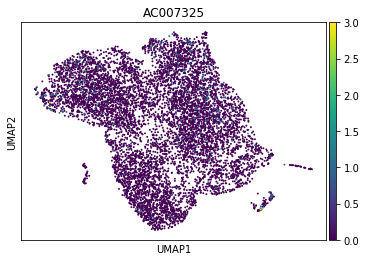

In [98]:
sc.pl.umap(sadata,color=['AC007325'])